# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading and summarising dataset

In [2]:
df = pd.read_csv(r"E:\Machine Learning Project\credit_analysis\credit_risk_dataset.csv")

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.shape

(32581, 12)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


# EDA & preprocessing 

In [7]:
df.duplicated().sum()

165

In [8]:
boolean_series = df.duplicated(keep = 'first')

In [9]:
df = df[~boolean_series]
df.reset_index(inplace = True, drop = True)

In [10]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [11]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
df[df['loan_int_rate'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32382,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32387,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32388,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32404,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [13]:
df[df['person_emp_length'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32120,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32163,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32195,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32288,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


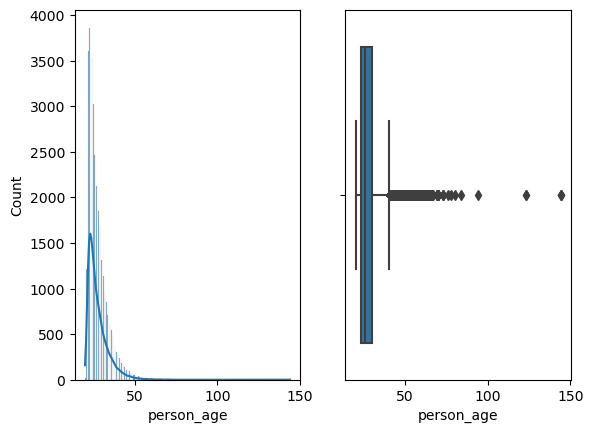

In [14]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df, x = 'person_age', kde = True, ax=axes[0])
sns.boxplot(x = df['person_age'], ax=axes[1]);

In [15]:
df_cl = df.copy()

In [16]:
def outlier_iqr(col, df):
    q1, q3 = np.nanpercentile(df[col], [25, 75])
    iqr = q3 -q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df_copy = df.copy()
    df_copy[col] = np.where(df_copy[col] > upper_limit, upper_limit, df_copy[col])
    df_copy[col] = np.where(df_copy[col] < lower_limit, lower_limit, df_copy[col])

    
    
    return df_copy[col]

<Axes: >

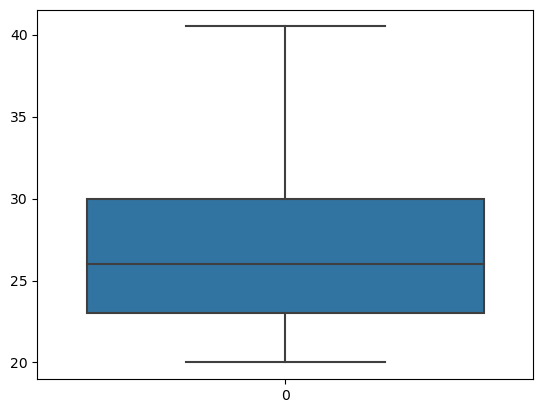

In [17]:
sns.boxplot(outlier_iqr('person_age', df))

In [18]:
df_cl['person_age'] = outlier_iqr('person_age', df)

In [19]:
df_cl['person_age'].skew()

1.0158610093217058

In [20]:
df_cl['person_age'].kurtosis()

0.15107329244743806

In [21]:
np.log(df_cl['person_age']).skew()

0.7239314919736962

In [22]:
df_cl['person_age'] = np.log(df_cl['person_age'])

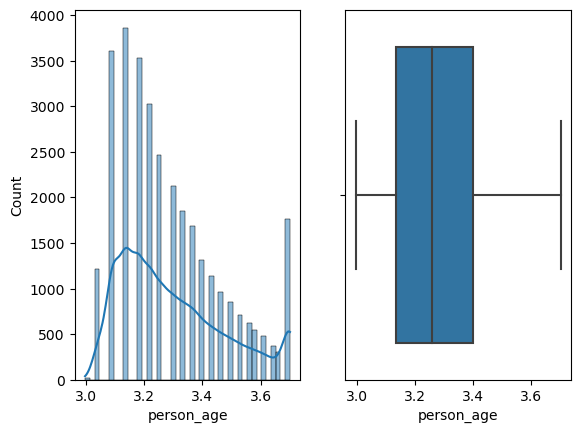

In [23]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'person_age', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['person_age'], ax=axes[1]);

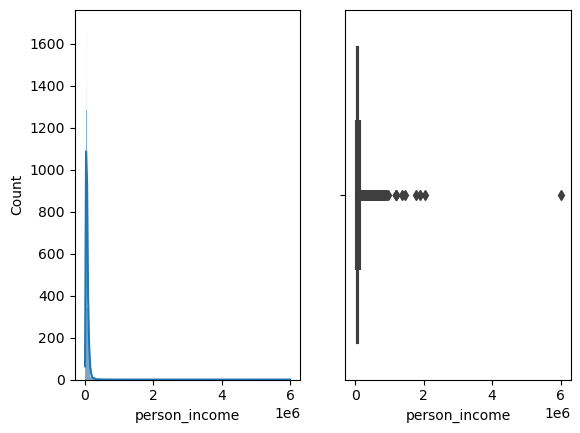

In [24]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df, x = 'person_income', kde = True, ax=axes[0])
sns.boxplot(x = df['person_income'], ax=axes[1]);

In [25]:
df_cl['person_income'] = outlier_iqr('person_income', df)


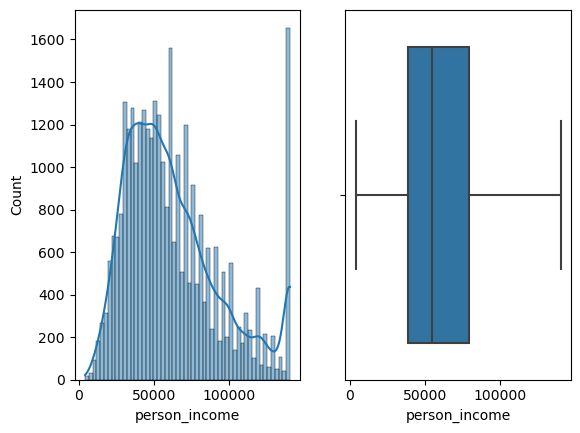

In [26]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'person_income', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['person_income'], ax=axes[1]);

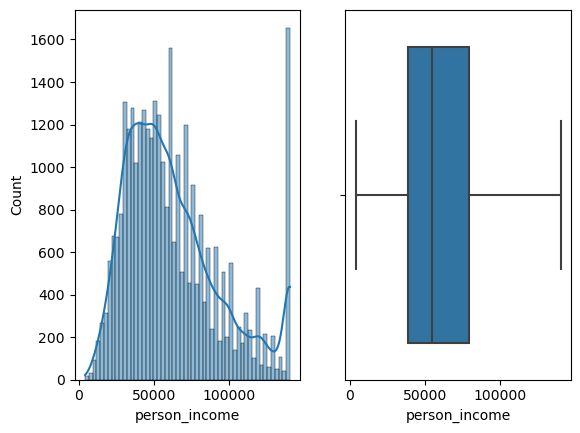

In [27]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'person_income', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['person_income'], ax=axes[1]);

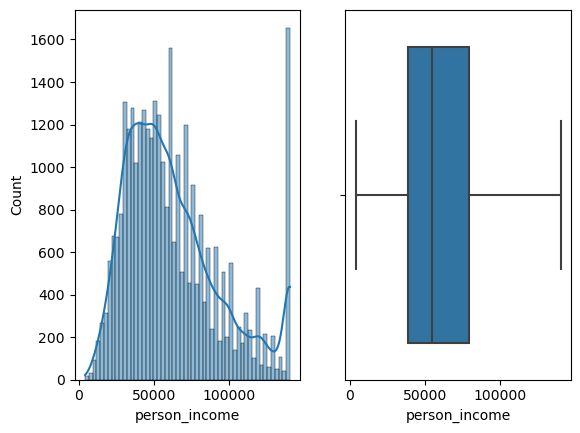

In [28]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'person_income', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['person_income'], ax=axes[1]);

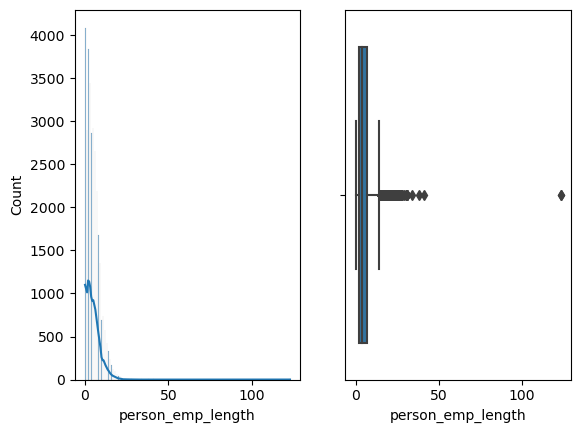

In [29]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df, x = 'person_emp_length', kde = True, ax=axes[0])
sns.boxplot(x = df['person_emp_length'], ax=axes[1]);


In [30]:
df.isnull().sum()[df.isnull().sum()>0]

person_emp_length     887
loan_int_rate        3095
dtype: int64

In [31]:
len(df)

32416

In [32]:
outlier_iqr('person_emp_length', df_cl).describe()

count    31529.000000
mean         4.701925
std          3.769535
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         14.500000
Name: person_emp_length, dtype: float64

In [33]:
df_cl['person_emp_length'] = outlier_iqr('person_emp_length', df_cl)

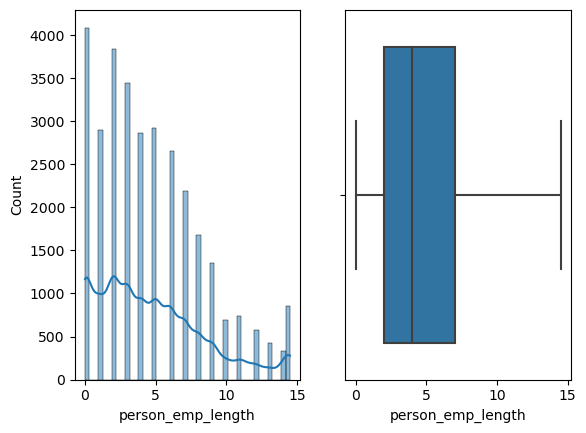

In [34]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'person_emp_length', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['person_emp_length'], ax=axes[1]);

In [35]:
df_cl['person_emp_length'].skew()

0.8036046433202751

In [36]:
df_cl['person_emp_length'].mean()

4.701925211709854

In [37]:
df_cl['person_emp_length'].fillna(df_cl['person_emp_length'].mean(), inplace = True)

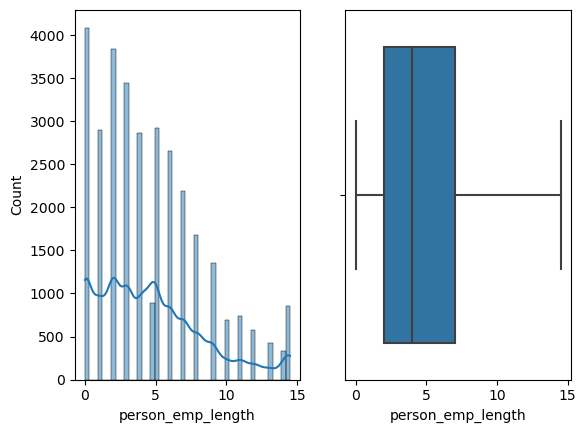

In [38]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'person_emp_length', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['person_emp_length'], ax=axes[1]);

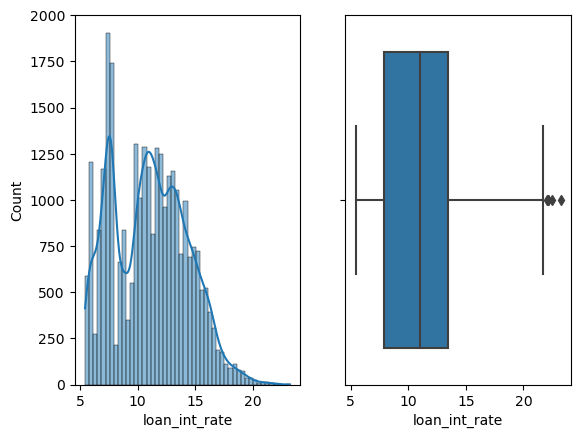

In [39]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df, x = 'loan_int_rate', kde = True, ax=axes[0])
sns.boxplot(x = df['loan_int_rate'], ax=axes[1]);


In [40]:
df['loan_int_rate'].skew()

0.2070016541005385

In [41]:
df['loan_int_rate'].kurtosis()

-0.67307554031354

In [42]:
df_cl['loan_int_rate'] = outlier_iqr('loan_int_rate', df)

In [43]:
df_cl['loan_int_rate'] = np.log(df_cl['loan_int_rate'])

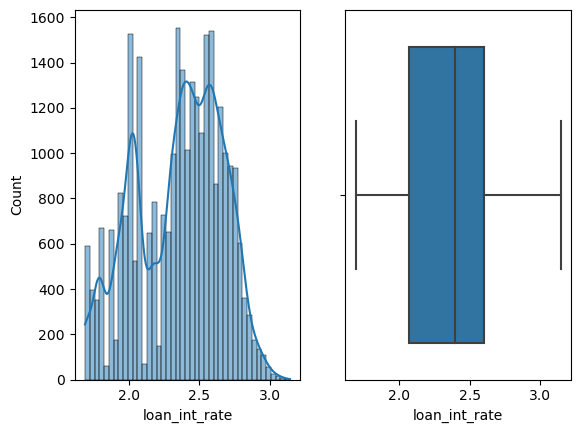

In [44]:
f, axes = plt.subplots(1, 2)

sns.histplot(x = np.log(df['loan_int_rate']), kde = True, ax=axes[0])
sns.boxplot(x = np.log(df['loan_int_rate']), ax=axes[1]);

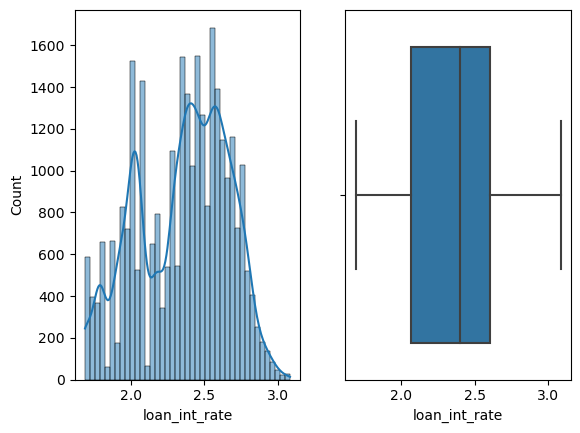

In [45]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'loan_int_rate', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['loan_int_rate'], ax=axes[1]);

In [46]:
df_cl['loan_int_rate'].fillna(df_cl['loan_int_rate'].mean(), inplace = True)


In [47]:
df_cl['loan_int_rate'].skew()

-0.3308078476768881

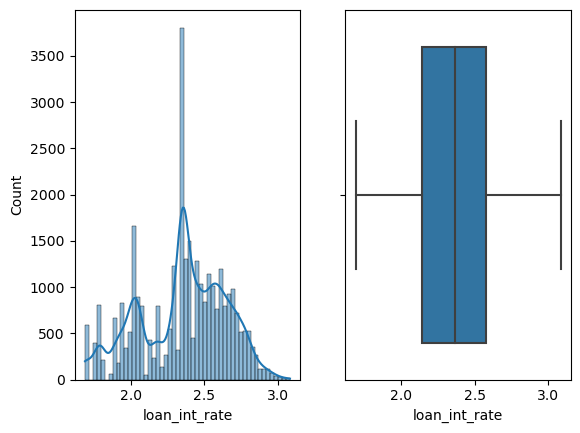

In [48]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'loan_int_rate', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['loan_int_rate'], ax=axes[1]);

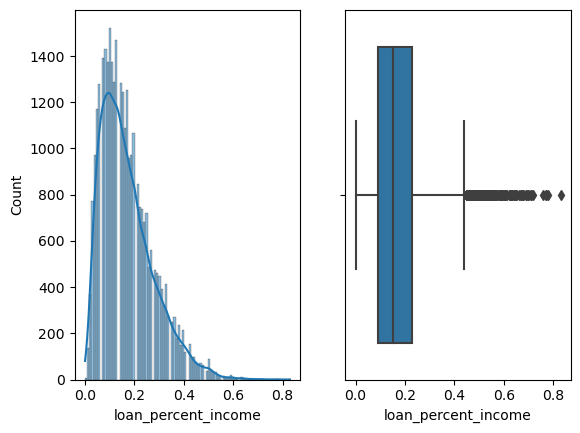

In [49]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'loan_percent_income', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['loan_percent_income'], ax=axes[1]);

In [50]:
df_cl['loan_percent_income'] = outlier_iqr('loan_percent_income', df)


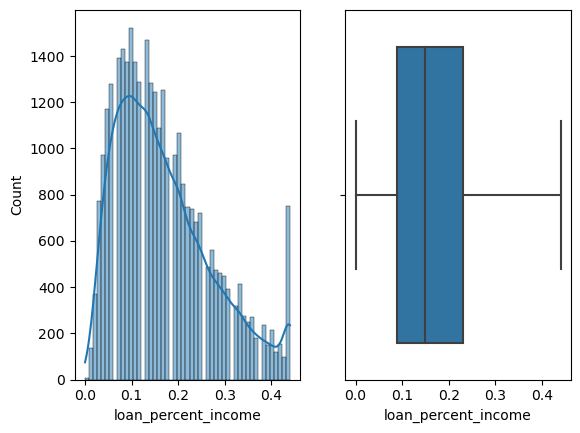

In [51]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'loan_percent_income', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['loan_percent_income'], ax=axes[1]);

In [52]:
df_cl['loan_percent_income'].skew()

0.809649424984641

In [53]:
df_cl['loan_percent_income'].isnull().sum()

0

In [54]:
np.sqrt(df_cl['loan_percent_income']).skew()

0.18174943406274388

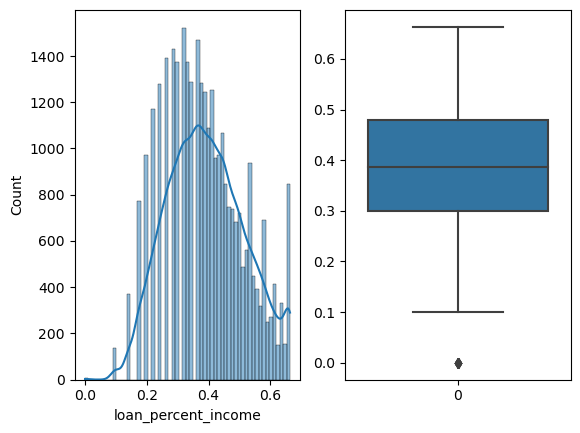

In [55]:
f, axes = plt.subplots(1, 2)

sns.histplot( np.sqrt(df_cl['loan_percent_income']), kde = True, ax=axes[0])
sns.boxplot(np.sqrt(df_cl['loan_percent_income']), ax=axes[1]);

In [56]:
df_cl['loan_percent_income'] = np.sqrt(df_cl['loan_percent_income'])

In [57]:
df_cl= df_cl[df_cl['loan_percent_income'] != 0]

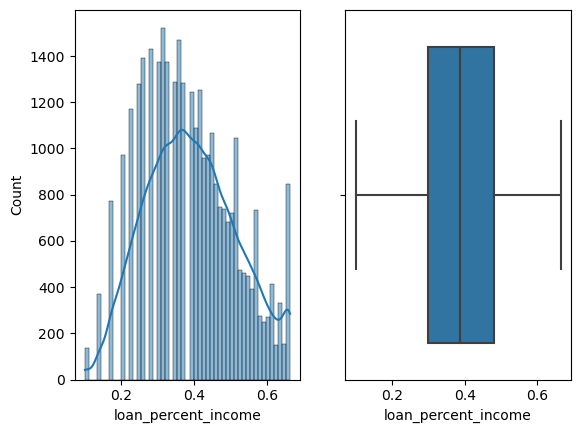

In [58]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'loan_percent_income', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['loan_percent_income'], ax=axes[1]);


In [59]:
df_cl.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,3.091042,59000.0,RENT,14.5,PERSONAL,D,35000,2.773838,1,0.663325,Y,3
1,3.044522,9600.0,OWN,5.0,EDUCATION,B,1000,2.410542,0,0.316228,N,2
2,3.218876,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,2.554899,1,0.663325,N,3
3,3.135494,65500.0,RENT,4.0,MEDICAL,C,35000,2.723267,1,0.663325,N,2
4,3.178054,54400.0,RENT,8.0,MEDICAL,C,35000,2.658159,1,0.663325,Y,4


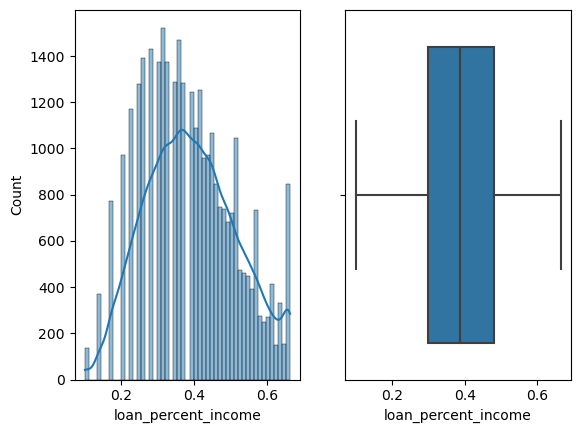

In [60]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'loan_percent_income', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['loan_percent_income'], ax=axes[1]);

In [61]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

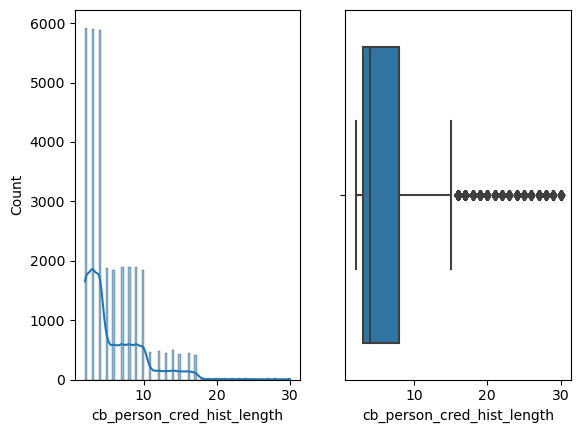

In [62]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df, x = 'cb_person_cred_hist_length', kde = True, ax=axes[0])
sns.boxplot(x = df['cb_person_cred_hist_length'], ax=axes[1]);


In [63]:
df['cb_person_cred_hist_length'].skew()

1.6593687613558725

In [64]:
np.log(df_cl['cb_person_cred_hist_length']).skew()

0.3274359997465942

In [65]:
np.sqrt(df_cl['cb_person_cred_hist_length']).skew()

0.8936264307410465

In [66]:
np.square(df_cl['cb_person_cred_hist_length']).skew()

4.33048487912257

In [67]:
df_cl['cb_person_cred_hist_length'] = outlier_iqr('cb_person_cred_hist_length', df)

In [68]:
df_cl['cb_person_cred_hist_length'] = np.log(df_cl['cb_person_cred_hist_length'])

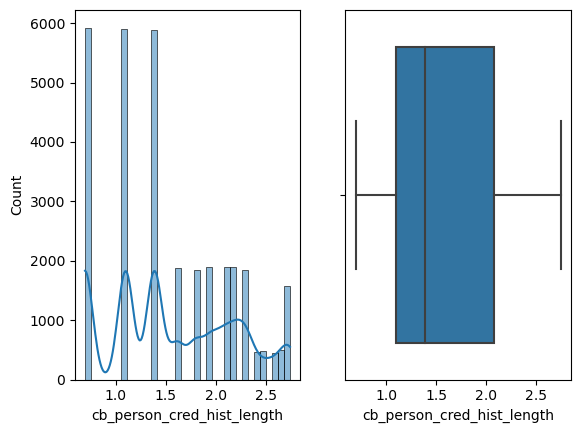

In [69]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'cb_person_cred_hist_length', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['cb_person_cred_hist_length'], ax=axes[1]);

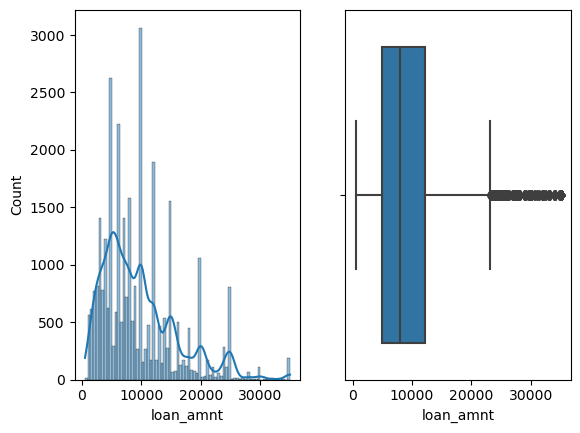

In [70]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df, x = 'loan_amnt', kde = True, ax=axes[0])
sns.boxplot(x = df['loan_amnt'], ax=axes[1]);


In [71]:
df_cl['loan_amnt'] = outlier_iqr('loan_amnt', df)

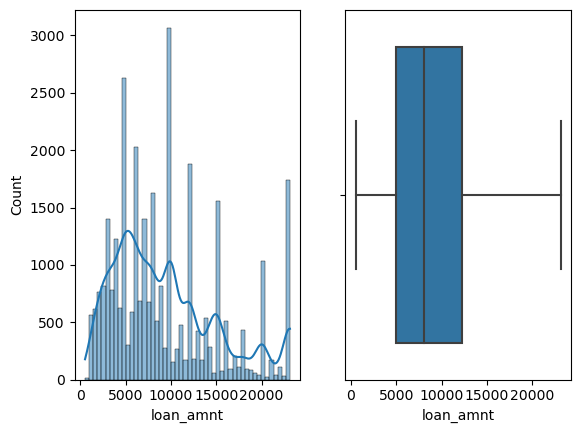

In [72]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'loan_amnt', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['loan_amnt'], ax=axes[1]);

In [73]:
df_cl['loan_amnt'].skew()

0.8126096164473234

In [74]:
np.log(df_cl['loan_amnt']).skew()

-0.5299598034382881

In [75]:
np.log(df_cl['loan_amnt']).kurtosis()

-0.056297819075914024

In [76]:
df_cl['loan_amnt'].skew()

0.8126096164473234

In [77]:
df['loan_amnt'].describe()

count    32416.000000
mean      9593.845632
std       6322.730241
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12250.000000
max      35000.000000
Name: loan_amnt, dtype: float64

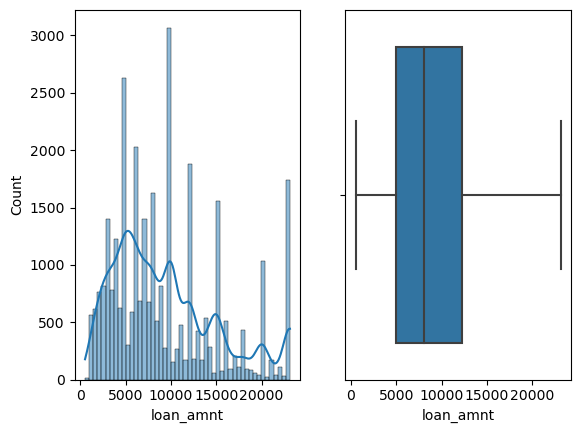

In [78]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'loan_amnt', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['loan_amnt'], ax=axes[1]);


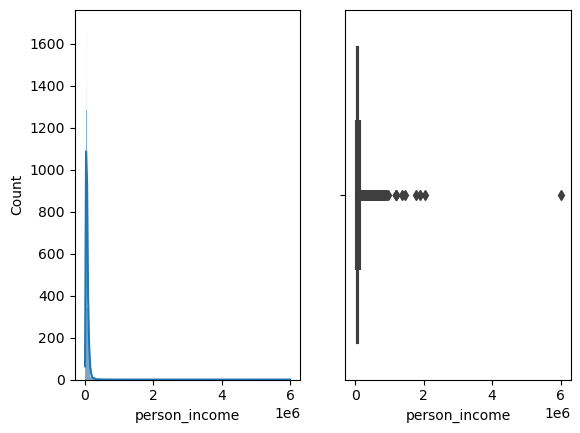

In [79]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df, x = 'person_income', kde = True, ax=axes[0])
sns.boxplot(x = df['person_income'], ax=axes[1]);


In [80]:
df['person_income'].skew()

32.95874828815014

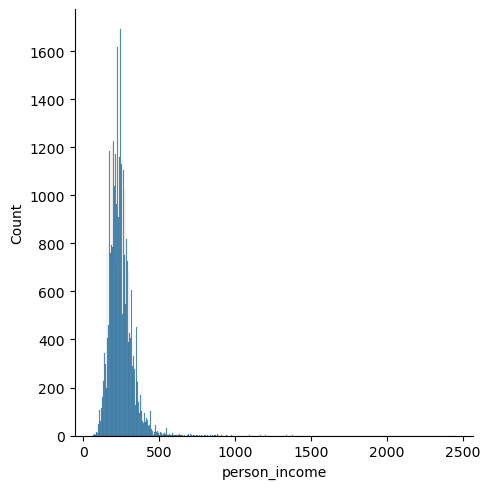

In [81]:
sns.displot(np.sqrt(df['person_income']))

In [82]:
np.sqrt(df['person_income']).skew()

2.7965719925852843

In [83]:
np.log(df['person_income']).skew()

0.1577119048511239

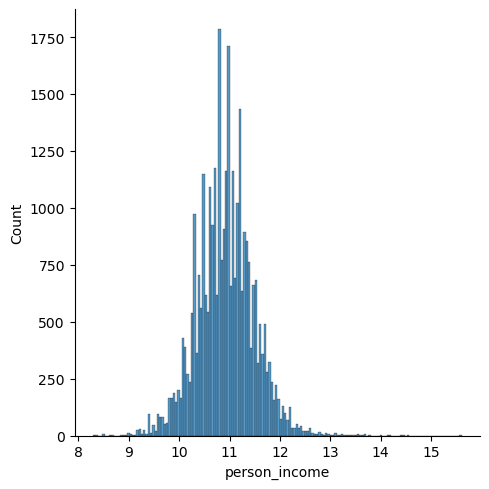

In [84]:
sns.displot(np.log(df['person_income']))

In [85]:
df_cl.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,3.091042,59000.0,RENT,14.5,PERSONAL,D,23125.0,2.773838,1,0.663325,Y,1.098612
1,3.044522,9600.0,OWN,5.0,EDUCATION,B,1000.0,2.410542,0,0.316228,N,0.693147
2,3.218876,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,2.554899,1,0.663325,N,1.098612
3,3.135494,65500.0,RENT,4.0,MEDICAL,C,23125.0,2.723267,1,0.663325,N,0.693147
4,3.178054,54400.0,RENT,8.0,MEDICAL,C,23125.0,2.658159,1,0.663325,Y,1.386294


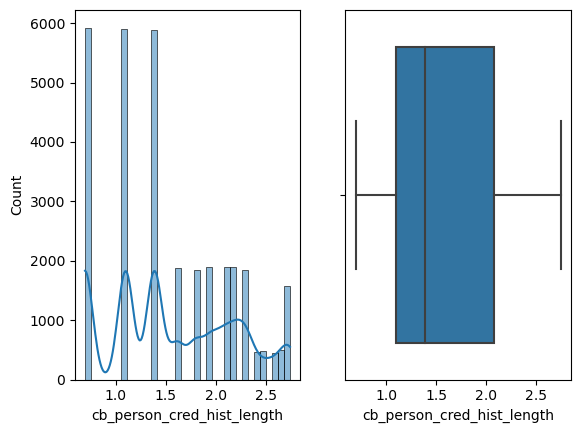

In [203]:
f, axes = plt.subplots(1, 2)

sns.histplot(data = df_cl, x = 'cb_person_cred_hist_length', kde = True, ax=axes[0])
sns.boxplot(x = df_cl['cb_person_cred_hist_length'], ax=axes[1]);

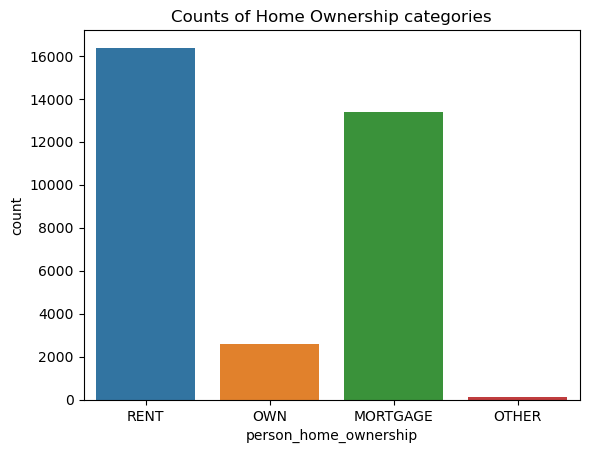

In [87]:
sns.countplot(data =df_cl, x = 'person_home_ownership')
plt.title('Counts of Home Ownership categories');

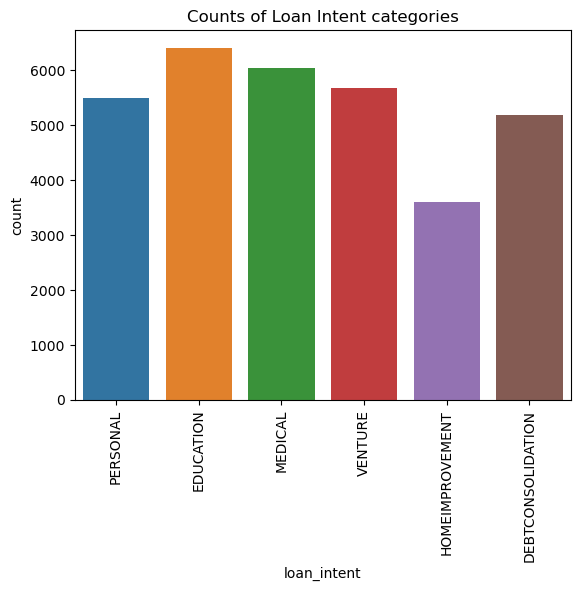

In [88]:
sns.countplot(data =df_cl, x = 'loan_intent')
plt.xticks(rotation = 90)
plt.title('Counts of Loan Intent categories')
plt.show()

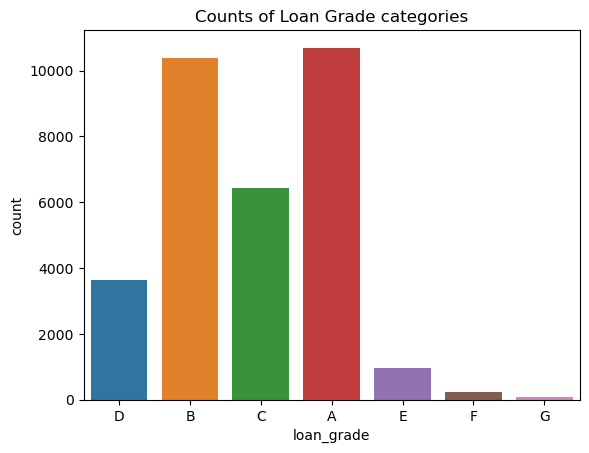

In [89]:
sns.countplot(data =df_cl, x = 'loan_grade')
plt.title('Counts of Loan Grade categories')
plt.show()

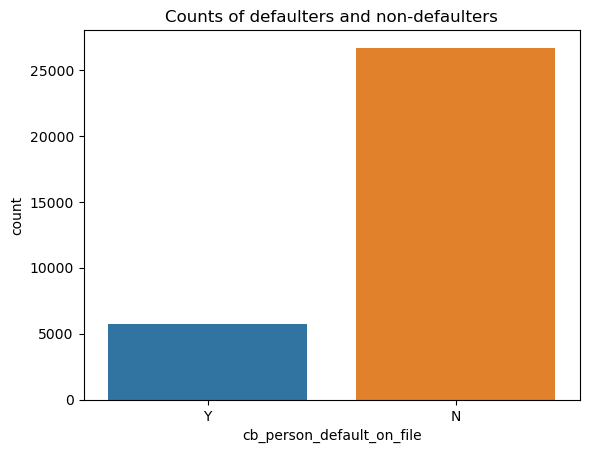

In [90]:
sns.countplot(data = df_cl, x = 'cb_person_default_on_file')
plt.title('Counts of defaulters and non-defaulters')
plt.show()

In [91]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: xlabel='loan_status', ylabel='person_age'>

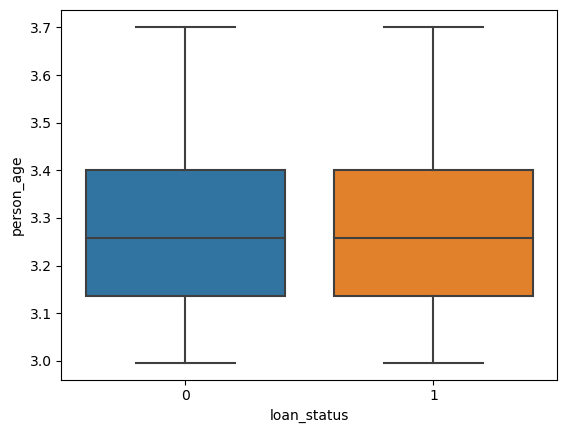

In [92]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'person_age')

<Axes: xlabel='loan_status', ylabel='count'>

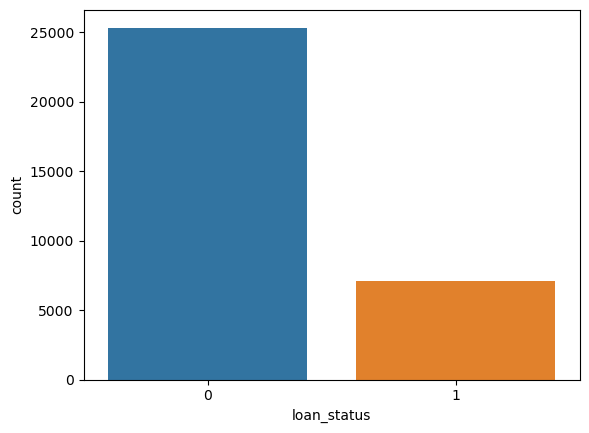

In [93]:
sns.countplot(data = df_cl, x = 'loan_status')

In [94]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: xlabel='person_home_ownership', ylabel='loan_amnt'>

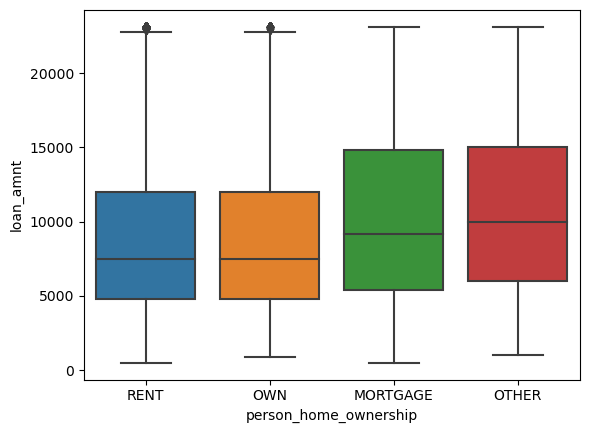

In [95]:
sns.boxplot(data = df_cl, x = 'person_home_ownership', y = 'loan_amnt')

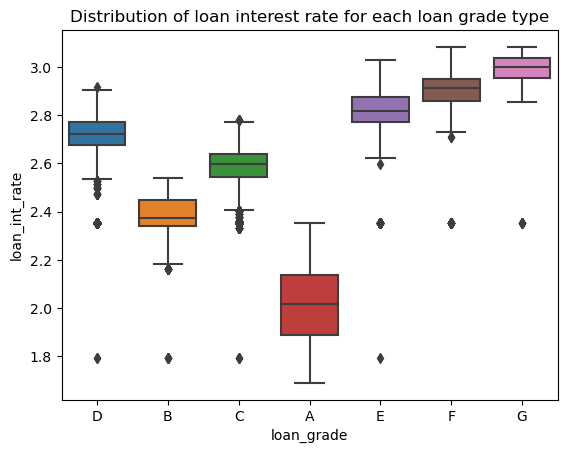

In [96]:
sns.boxplot(data = df_cl, x = 'loan_grade', y = 'loan_int_rate')
plt.title('Distribution of loan interest rate for each loan grade type');

<Axes: xlabel='person_home_ownership', ylabel='loan_int_rate'>

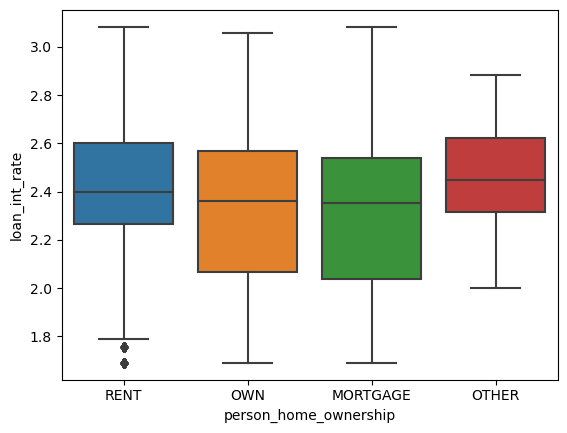

In [97]:
sns.boxplot(data = df_cl, x = 'person_home_ownership', y = 'loan_int_rate')

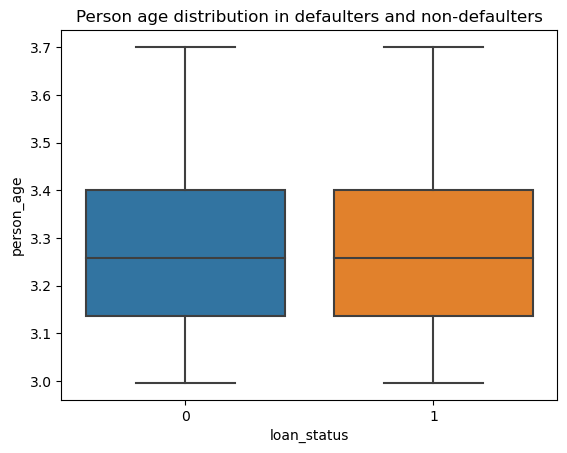

In [98]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'person_age')
plt.title('Person age distribution in defaulters and non-defaulters')
plt.show()

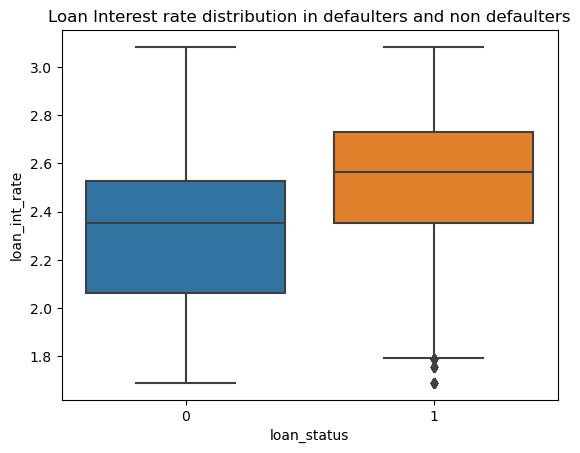

In [99]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'loan_int_rate')
plt.title('Loan Interest rate distribution in defaulters and non defaulters')
plt.show()

In [100]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: title={'center': 'Proportion of loan grade in defaulters vs non defaulters'}, xlabel='loan_status'>

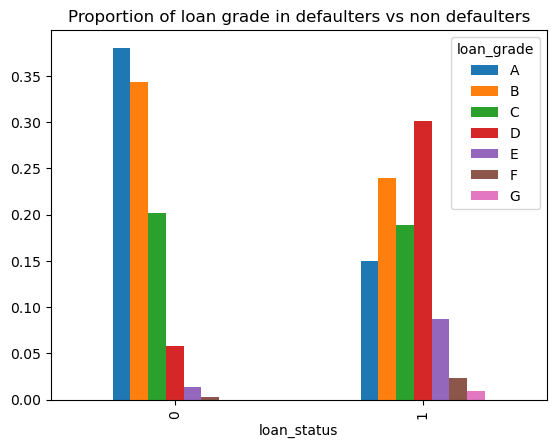

In [101]:
pd.crosstab(df_cl['loan_status'], df_cl['loan_grade'], normalize = 'index').plot(kind = 'bar', title = 'Proportion of loan grade in defaulters vs non defaulters')

<Axes: title={'center': 'Proportion of loan intent in defaulters vs non defaulters'}, xlabel='loan_status'>

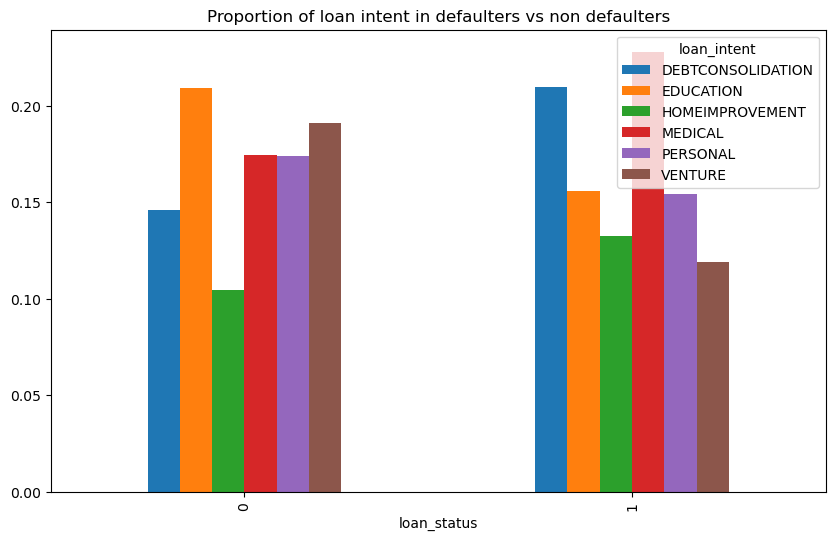

In [102]:
pd.crosstab(df_cl['loan_status'], df_cl['loan_intent'], normalize = 'index').plot(kind = 'bar', figsize = (10,6), title = ('Proportion of loan intent in defaulters vs non defaulters'))

<Axes: title={'center': 'Proportion of customers with default on their file'}, xlabel='loan_status'>

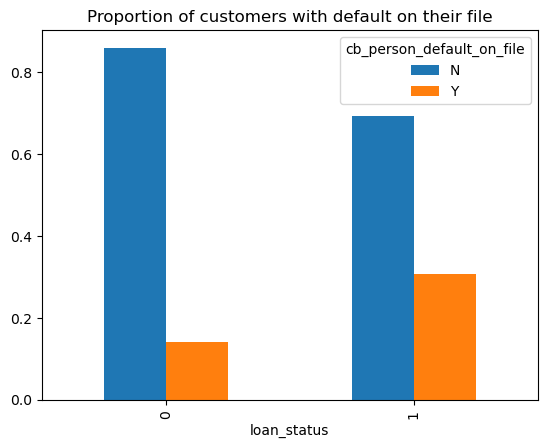

In [103]:
pd.crosstab(df_cl['loan_status'], df_cl['cb_person_default_on_file'], normalize = 'index').plot(kind = 'bar', title = 'Proportion of customers with default on their file')

<Axes: title={'center': 'Proportion of loan grade for each loan intent'}, xlabel='loan_intent'>

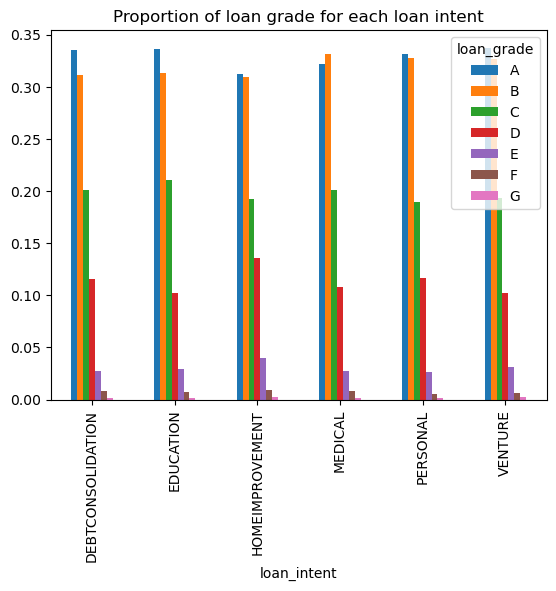

In [104]:
pd.crosstab(df_cl['loan_intent'], df_cl['loan_grade'], normalize = 'index').plot(kind = 'bar', title = 'Proportion of loan grade for each loan intent')

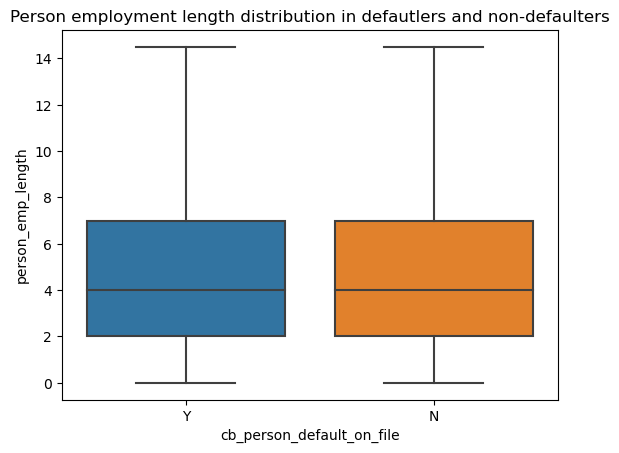

In [105]:
sns.boxplot(data = df_cl, x = 'cb_person_default_on_file', y  = 'person_emp_length')
plt.title('Person employment length distribution in defautlers and non-defaulters')
plt.show()

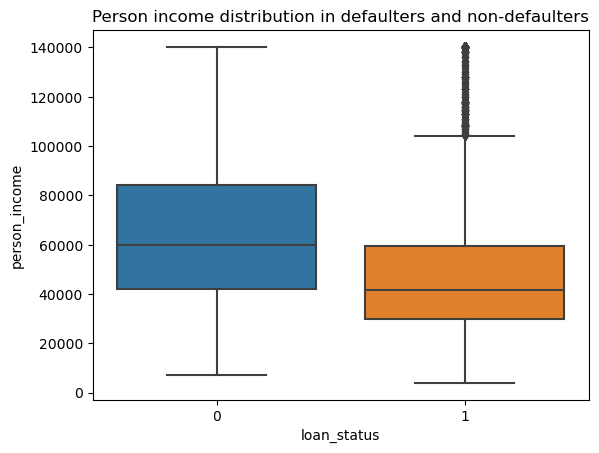

In [106]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'person_income')
plt.title('Person income distribution in defaulters and non-defaulters')
plt.show()

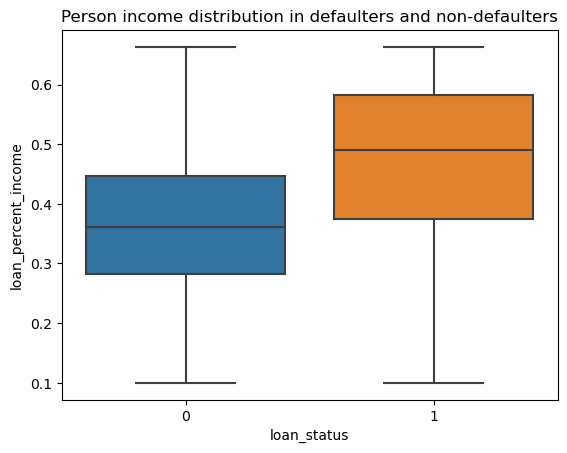

In [107]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'loan_percent_income')
plt.title('Person income distribution in defaulters and non-defaulters')
plt.show()

In [108]:
df_cl.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: xlabel='loan_int_rate', ylabel='loan_amnt'>

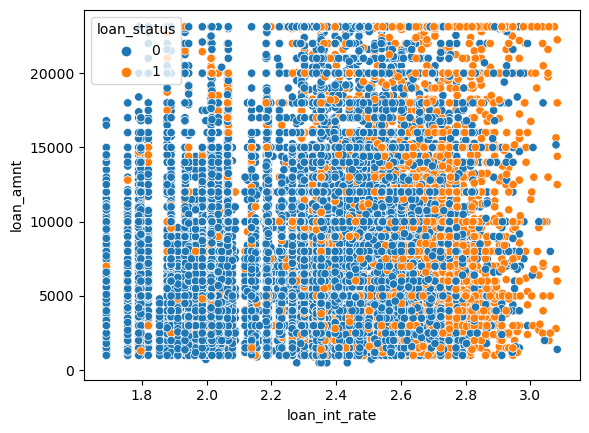

In [109]:
sns.scatterplot(data = df_cl, x = 'loan_int_rate', y = 'loan_amnt', hue = 'loan_status')

<Axes: xlabel='person_home_ownership', ylabel='loan_int_rate'>

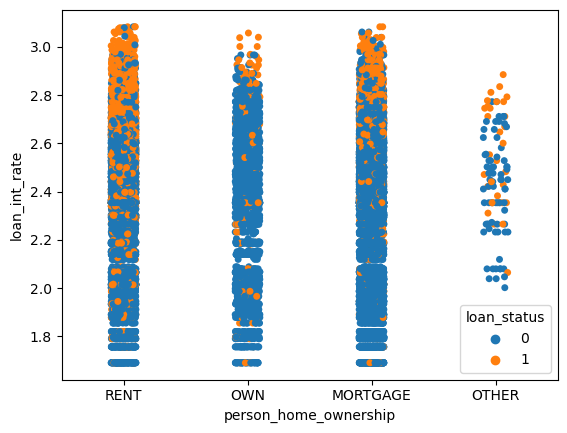

In [110]:
sns.stripplot(data = df_cl, x = 'person_home_ownership', y = 'loan_int_rate', hue = 'loan_status', jitter = True)

In [111]:
emp_lenght = df_cl['person_emp_length'].round(2)

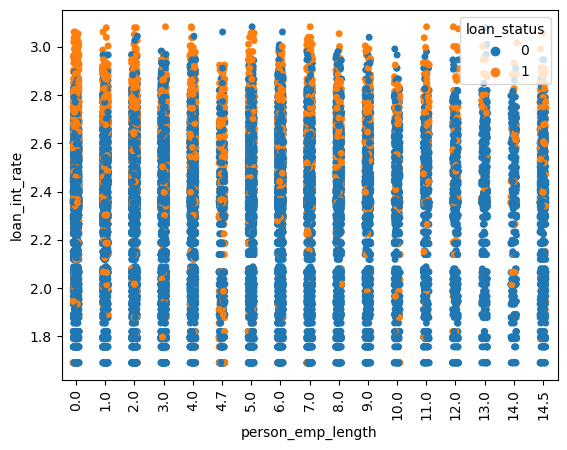

In [112]:
sns.stripplot(data = df_cl, x = emp_lenght , y = 'loan_int_rate', hue = 'loan_status', jitter = True)
plt.xticks(rotation = 90);

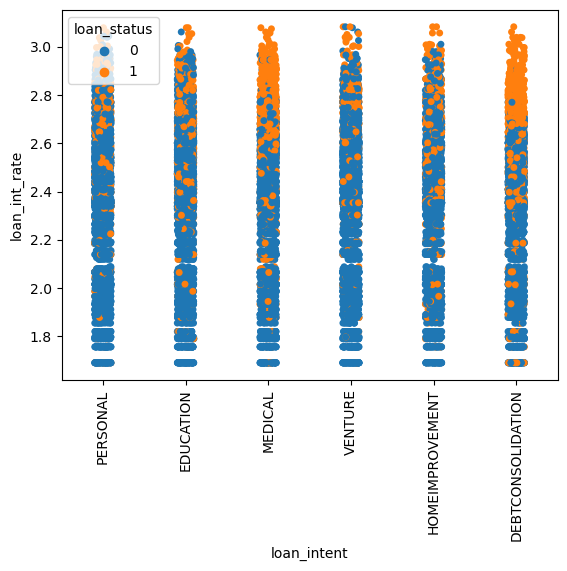

In [113]:
sns.stripplot(data = df_cl, x = 'loan_intent', y = 'loan_int_rate', hue = 'loan_status', jitter = True)
plt.xticks(rotation = 90);

In [114]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

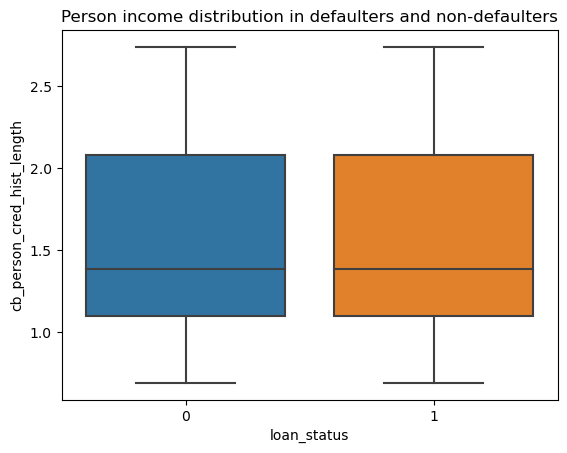

In [115]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'cb_person_cred_hist_length')
plt.title('Person income distribution in defaulters and non-defaulters')
plt.show()

In [116]:
df['loan_status'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [117]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

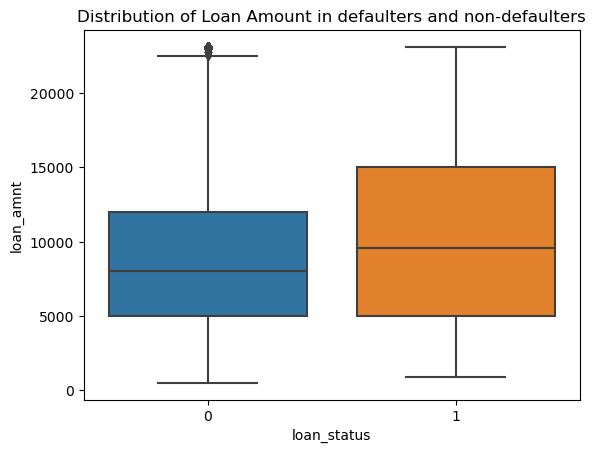

In [118]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'loan_amnt')
plt.title('Distribution of Loan Amount in defaulters and non-defaulters')
plt.show()

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

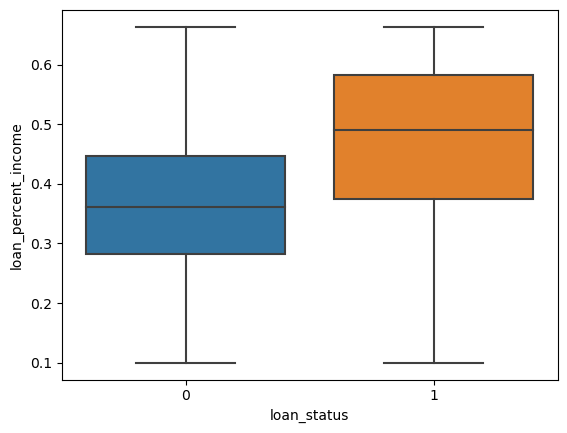

In [119]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'loan_percent_income')

<Axes: xlabel='loan_status', ylabel='person_income'>

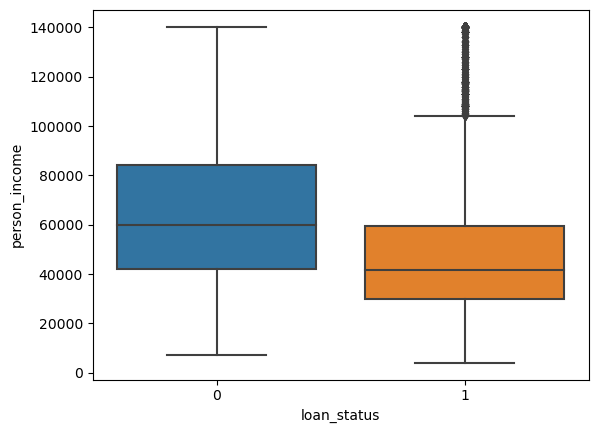

In [120]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'person_income')

<Axes: xlabel='loan_status', ylabel='person_age'>

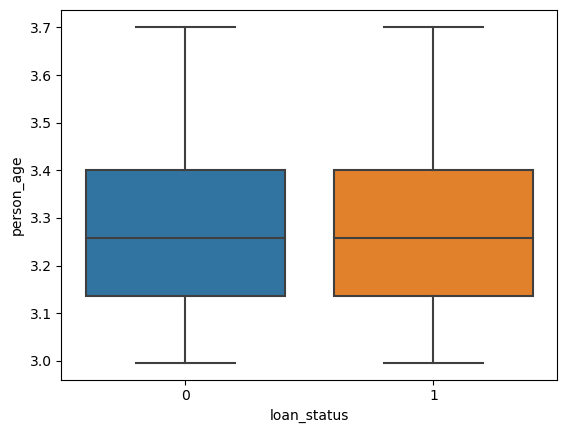

In [121]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'person_age')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

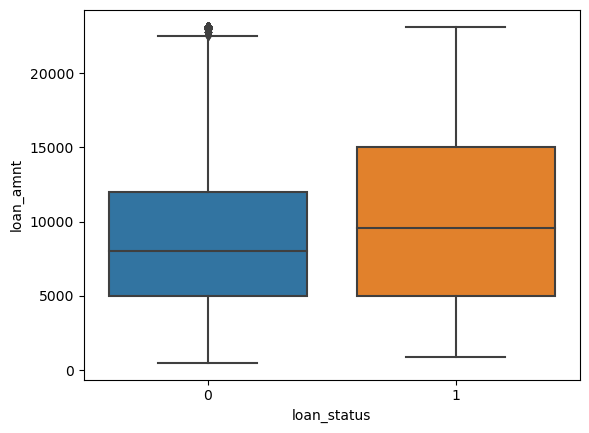

In [122]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'loan_amnt')

<Axes: xlabel='loan_status', ylabel='person_emp_length'>

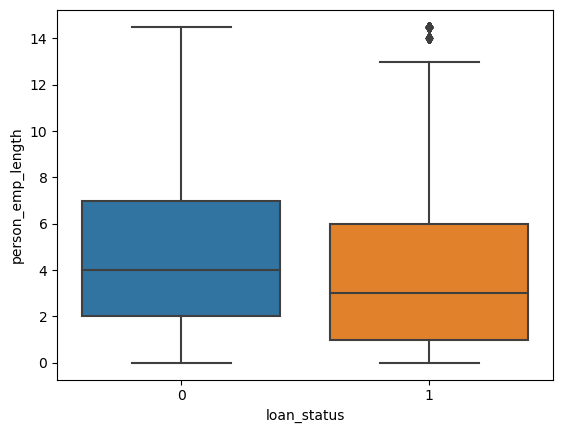

In [123]:
sns.boxplot(data = df_cl, x = 'loan_status', y = 'person_emp_length')

<Axes: xlabel='loan_status'>

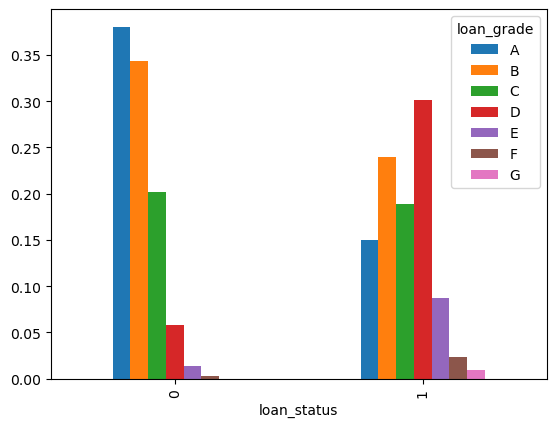

In [124]:
pd.crosstab(df_cl['loan_status'], df_cl['loan_grade'], normalize = 'index').plot(kind = 'bar')

In [125]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: xlabel='loan_status'>

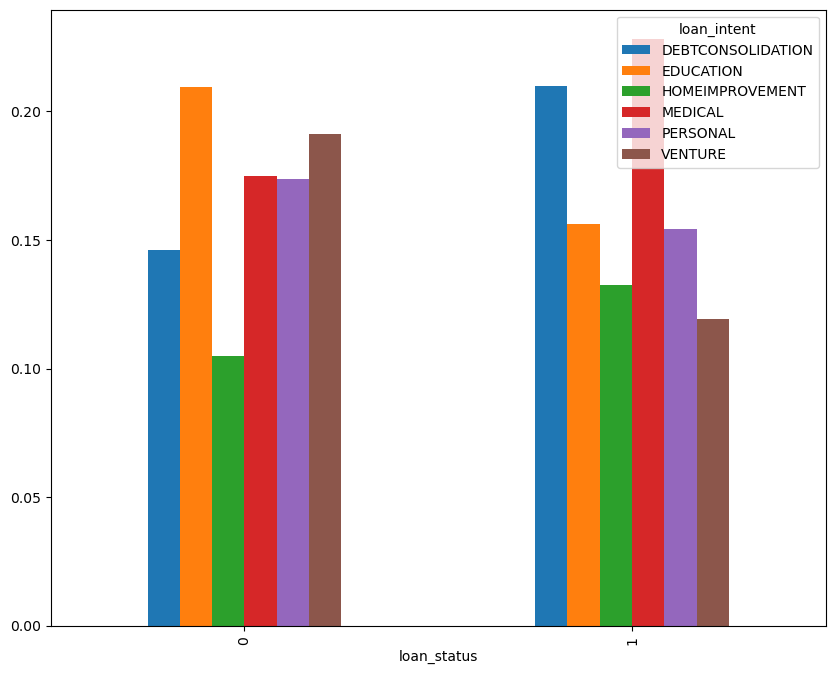

In [126]:
pd.crosstab(df_cl['loan_status'], df_cl['loan_intent'], normalize = 'index').plot(kind = 'bar', figsize = (10,8))

In [127]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

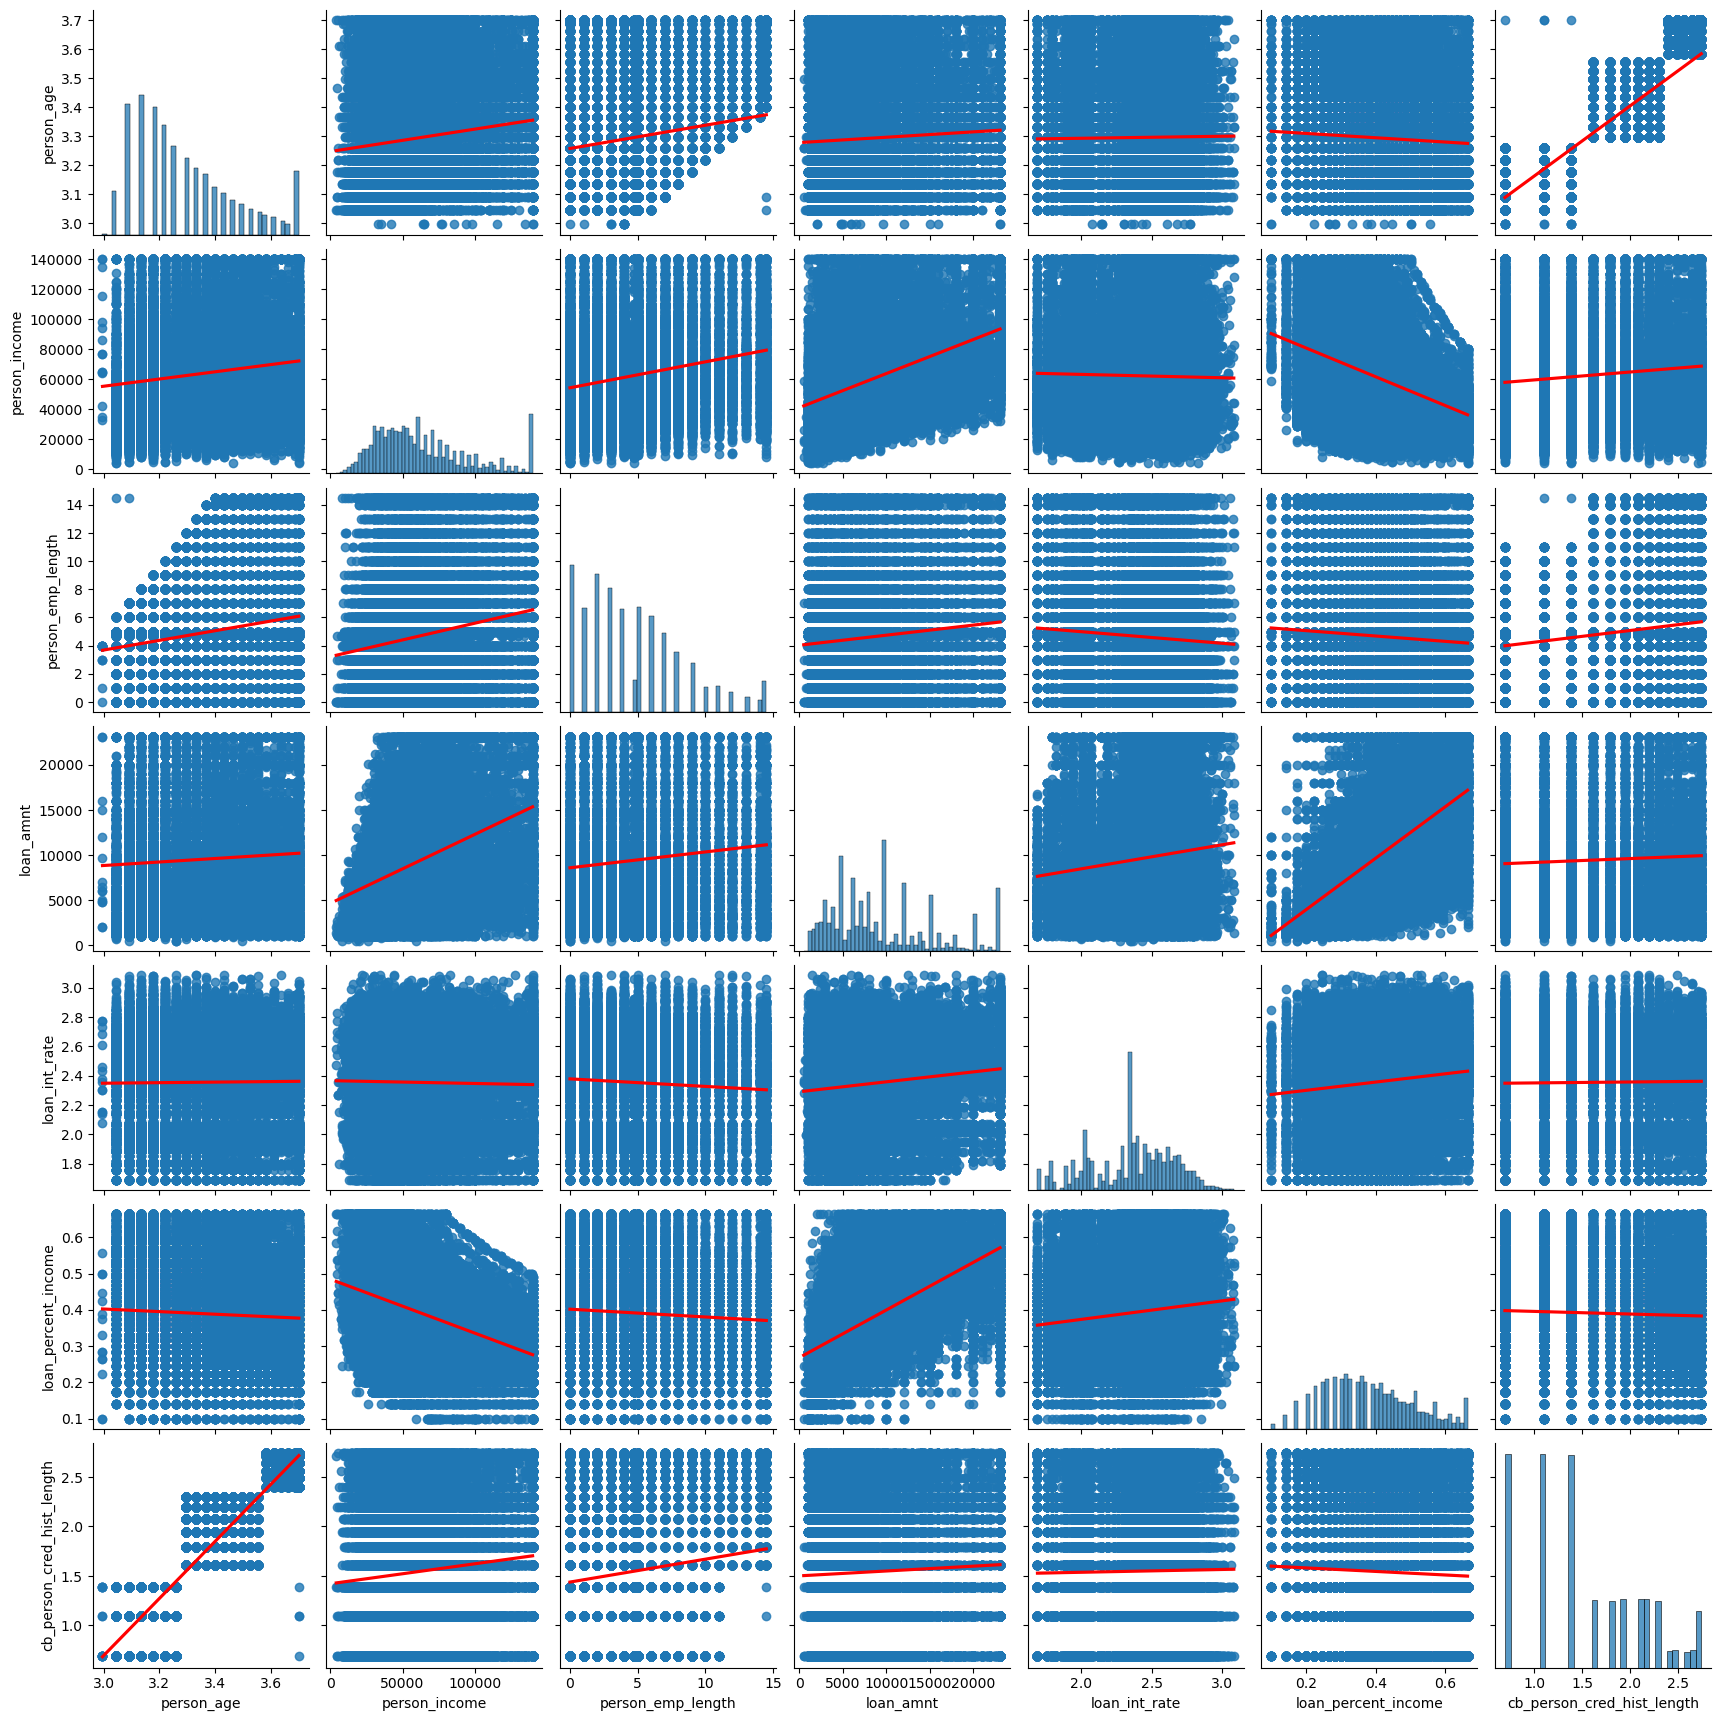

In [128]:
sns.pairplot(df_cl[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

<Axes: >

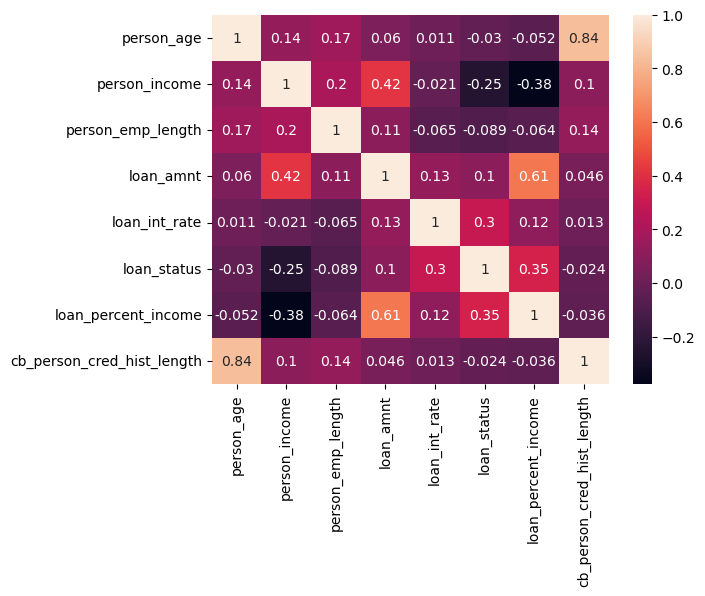

In [129]:
sns.heatmap(df_cl.corr(numeric_only = True), annot = True)

<Axes: xlabel='person_emp_length', ylabel='Count'>

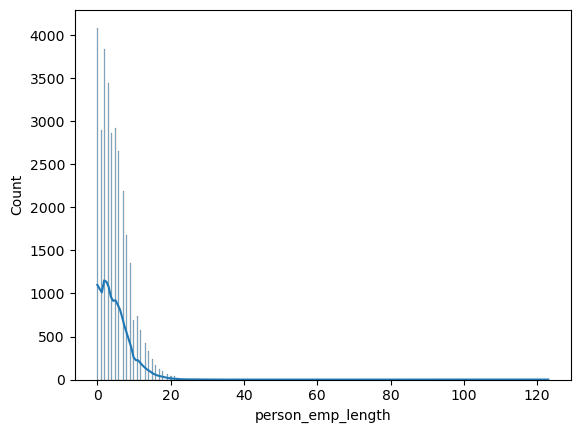

In [130]:
sns.histplot(df['person_emp_length'], kde = True)

In [131]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [132]:
dum_ho = pd.get_dummies(df_cl['person_home_ownership'], prefix = 'HO')

In [133]:
df_copy = pd.concat([df_cl, dum_ho], axis = 1)

In [134]:
dum_li = pd.get_dummies(df_copy['loan_intent'], prefix = 'LI')

In [135]:
df_copy = pd.concat([df_copy, dum_li], axis = 1)

In [136]:
dum_lg = pd.get_dummies(df_copy['loan_grade'], prefix = 'LG')

In [137]:
df_copy = pd.concat([df_copy, dum_lg], axis = 1)

In [138]:
df_copy.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,LI_MEDICAL,LI_PERSONAL,LI_VENTURE,LG_A,LG_B,LG_C,LG_D,LG_E,LG_F,LG_G
0,3.091042,59000.0,RENT,14.5,PERSONAL,D,23125.0,2.773838,1,0.663325,...,0,1,0,0,0,0,1,0,0,0
1,3.044522,9600.0,OWN,5.0,EDUCATION,B,1000.0,2.410542,0,0.316228,...,0,0,0,0,1,0,0,0,0,0
2,3.218876,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,2.554899,1,0.663325,...,1,0,0,0,0,1,0,0,0,0
3,3.135494,65500.0,RENT,4.0,MEDICAL,C,23125.0,2.723267,1,0.663325,...,1,0,0,0,0,1,0,0,0,0
4,3.178054,54400.0,RENT,8.0,MEDICAL,C,23125.0,2.658159,1,0.663325,...,1,0,0,0,0,1,0,0,0,0


In [139]:
df_copy.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'HO_MORTGAGE', 'HO_OTHER', 'HO_OWN', 'HO_RENT', 'LI_DEBTCONSOLIDATION',
       'LI_EDUCATION', 'LI_HOMEIMPROVEMENT', 'LI_MEDICAL', 'LI_PERSONAL',
       'LI_VENTURE', 'LG_A', 'LG_B', 'LG_C', 'LG_D', 'LG_E', 'LG_F', 'LG_G'],
      dtype='object')

In [140]:
df_copy['cb_person_default_on_file'].value_counts()

N    26678
Y     5729
Name: cb_person_default_on_file, dtype: int64

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
encode = LabelEncoder()

In [143]:
df_copy['cb_person_default_on_file'] = encode.fit_transform(df_copy['cb_person_default_on_file'])

In [144]:
df_copy.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,LI_MEDICAL,LI_PERSONAL,LI_VENTURE,LG_A,LG_B,LG_C,LG_D,LG_E,LG_F,LG_G
0,3.091042,59000.0,RENT,14.5,PERSONAL,D,23125.0,2.773838,1,0.663325,...,0,1,0,0,0,0,1,0,0,0
1,3.044522,9600.0,OWN,5.0,EDUCATION,B,1000.0,2.410542,0,0.316228,...,0,0,0,0,1,0,0,0,0,0
2,3.218876,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,2.554899,1,0.663325,...,1,0,0,0,0,1,0,0,0,0
3,3.135494,65500.0,RENT,4.0,MEDICAL,C,23125.0,2.723267,1,0.663325,...,1,0,0,0,0,1,0,0,0,0
4,3.178054,54400.0,RENT,8.0,MEDICAL,C,23125.0,2.658159,1,0.663325,...,1,0,0,0,0,1,0,0,0,0


In [145]:
df_copy.drop(['person_home_ownership', 'loan_intent', 'loan_grade'], axis = 1, inplace = True)

In [146]:
df_copy.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'HO_MORTGAGE', 'HO_OTHER', 'HO_OWN', 'HO_RENT', 'LI_DEBTCONSOLIDATION',
       'LI_EDUCATION', 'LI_HOMEIMPROVEMENT', 'LI_MEDICAL', 'LI_PERSONAL',
       'LI_VENTURE', 'LG_A', 'LG_B', 'LG_C', 'LG_D', 'LG_E', 'LG_F', 'LG_G'],
      dtype='object')

In [147]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [148]:
#df_copy['person_age'] = scale.fit_transform(df_copy[['person_age']])
#df_copy['person_income'] = scale.fit_transform(df_copy[['person_income']])
#df_copy['person_emp_length'] = scale.fit_transform(df_copy[['person_emp_length']])
#df_copy['loan_int_rate'] = scale.fit_transform(df_copy[['loan_int_rate']])
#df_copy['loan_percent_income'] = scale.fit_transform(df_copy[['loan_percent_income']])
#df_copy['cb_person_cred_hist_length'] = scale.fit_transform(df_copy[['cb_person_cred_hist_length']])
#df_copy['loan_amnt'] = scale.fit_transform(df_copy[['loan_amnt']])








In [149]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32407.0,3.295443,0.180032,2.995732,3.135494,3.258097,3.401197,3.701302
person_income,32407.0,62415.424785,31785.374560,4000.000000,38500.000000,55000.000000,79200.000000,140232.000000
person_emp_length,32407.0,4.701333,3.717057,0.000000,2.000000,4.000000,7.000000,14.500000
loan_amnt,32407.0,9419.960965,5828.407888,500.000000,5000.000000,8000.000000,12250.000000,23125.000000
loan_int_rate,32407.0,2.353639,0.293600,1.690096,2.138889,2.362739,2.573375,3.083056
loan_status,32407.0,0.218749,0.413404,0.000000,0.000000,0.000000,0.000000,1.000000
loan_percent_income,32407.0,0.391553,0.124850,0.100000,0.300000,0.387298,0.479583,0.663325
cb_person_default_on_file,32407.0,0.176783,0.381491,0.000000,0.000000,0.000000,0.000000,1.000000
cb_person_cred_hist_length,32407.0,1.546959,0.620501,0.693147,1.098612,1.386294,2.079442,2.740840
HO_MORTGAGE,32407.0,0.412318,0.492259,0.000000,0.000000,0.000000,1.000000,1.000000


In [150]:
#df_majority = df_copy[df_copy['loan_status'] == 0]
#df_minority = df_copy[df_copy['loan_status'] == 1]

In [151]:
df_copy['loan_status'].value_counts()

0    25318
1     7089
Name: loan_status, dtype: int64

In [152]:
#len(df_majority)

In [153]:
from sklearn.utils import resample
#df_minority_upsampled = resample(df_minority, replace=True,    # sample with replacementn_samples= 21303, # to match majority classrandom_state=42)  # reproducible results

In [154]:
#len(df_minority_upsampled)

In [155]:
#df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [156]:
#df_upsampled.reset_index(inplace = True)

In [157]:
#df_upsampled['loan_status'].value_counts()

In [158]:
#df_upsampled.columns

In [159]:
#X = df_upsampled[['cb_person_cred_hist_length', 'person_income', 
#                  'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'MORTGAGE',
#       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
#       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
#       'E', 'F', 'G', 'historical_default' ]]
#y= df_upsampled['loan_status']

In [160]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [161]:
df_copy.isnull().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
HO_MORTGAGE                   0
HO_OTHER                      0
HO_OWN                        0
HO_RENT                       0
LI_DEBTCONSOLIDATION          0
LI_EDUCATION                  0
LI_HOMEIMPROVEMENT            0
LI_MEDICAL                    0
LI_PERSONAL                   0
LI_VENTURE                    0
LG_A                          0
LG_B                          0
LG_C                          0
LG_D                          0
LG_E                          0
LG_F                          0
LG_G                          0
dtype: int64

In [162]:
df_copy.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,HO_MORTGAGE,...,LI_MEDICAL,LI_PERSONAL,LI_VENTURE,LG_A,LG_B,LG_C,LG_D,LG_E,LG_F,LG_G
0,3.091042,59000.0,14.5,23125.0,2.773838,1,0.663325,1,1.098612,0,...,0,1,0,0,0,0,1,0,0,0
1,3.044522,9600.0,5.0,1000.0,2.410542,0,0.316228,0,0.693147,0,...,0,0,0,0,1,0,0,0,0,0
2,3.218876,9600.0,1.0,5500.0,2.554899,1,0.663325,0,1.098612,1,...,1,0,0,0,0,1,0,0,0,0
3,3.135494,65500.0,4.0,23125.0,2.723267,1,0.663325,0,0.693147,0,...,1,0,0,0,0,1,0,0,0,0
4,3.178054,54400.0,8.0,23125.0,2.658159,1,0.663325,1,1.386294,0,...,1,0,0,0,0,1,0,0,0,0


In [163]:
df_copy.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'HO_MORTGAGE', 'HO_OTHER', 'HO_OWN', 'HO_RENT', 'LI_DEBTCONSOLIDATION',
       'LI_EDUCATION', 'LI_HOMEIMPROVEMENT', 'LI_MEDICAL', 'LI_PERSONAL',
       'LI_VENTURE', 'LG_A', 'LG_B', 'LG_C', 'LG_D', 'LG_E', 'LG_F', 'LG_G'],
      dtype='object')

In [164]:
X = df_copy.drop(['loan_status','cb_person_cred_hist_length', 'loan_amnt'], axis = 1)
y = df_copy['loan_status']

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)

In [166]:
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.fit_transform(X_test)

In [167]:
df['loan_status'].value_counts(normalize = True)

0    0.781312
1    0.218688
Name: loan_status, dtype: float64

In [168]:
y_train.value_counts(normalize = True)

0    0.781238
1    0.218762
Name: loan_status, dtype: float64

In [169]:
y_test.value_counts(normalize = True)

0    0.781289
1    0.218711
Name: loan_status, dtype: float64

In [170]:
from sklearn.tree import DecisionTreeClassifier
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [171]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.fit_transform(X_test)

In [172]:
pred = train_using_gini(X_train_sc, X_test_sc, y_train).predict(X_test_sc)

In [173]:
y_test

17957    0
11969    0
22491    0
30780    0
31978    0
        ..
8307     0
30382    0
25173    0
5911     0
12389    0
Name: loan_status, Length: 8102, dtype: int64

In [174]:
np.mean(pred == y_test)

0.8783016539126142

In [175]:
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 8, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [176]:
pred_ent = train_using_entropy(X_train_sc, X_test_sc, y_train).predict(X_test_sc)

In [177]:
np.mean(pred_ent == y_test)

0.9298938533695383

In [178]:
pred_ent

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [179]:
y_test

17957    0
11969    0
22491    0
30780    0
31978    0
        ..
8307     0
30382    0
25173    0
5911     0
12389    0
Name: loan_status, Length: 8102, dtype: int64

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
!pip install xgboost


In [182]:
import xgboost 
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train_sc, y_train)
pred_xg = model_xg.predict(X_test_sc)


In [183]:
print('Accuracy of XGboost model {}%'.format((np.mean(pred_xg == y_test) * 100).round(2)))

Accuracy of XGboost model 93.58%


In [184]:
np.sum(y_test != pred_xg)

520

In [185]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model_xg, X, y , cv = 10)

In [186]:
accuracies.mean()

0.910205783537317

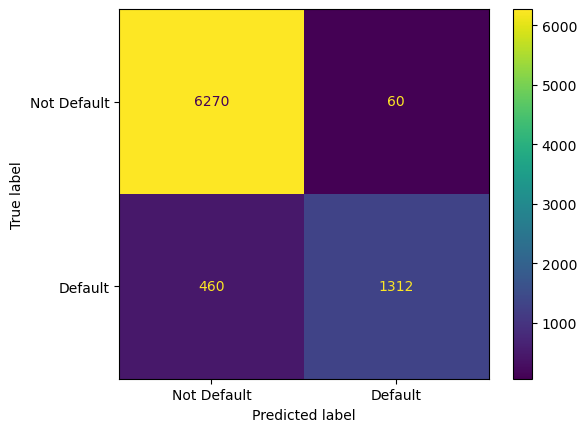

In [187]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred_xg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Not Default', 'Default'])

cm_display.plot()
plt.show()

In [188]:
from sklearn.metrics import classification_report

In [189]:
target_names = ['Not Default', 'Default']

In [190]:
print(classification_report(y_test, pred_xg, target_names=target_names))

              precision    recall  f1-score   support

 Not Default       0.93      0.99      0.96      6330
     Default       0.96      0.74      0.83      1772

    accuracy                           0.94      8102
   macro avg       0.94      0.87      0.90      8102
weighted avg       0.94      0.94      0.93      8102



In [191]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly')
clf.fit(X_train_sc, y_train)


SVC(kernel='poly')

In [192]:
pred_svc = clf.predict(X_test_sc)

In [193]:
print('Accuracy of SVC model {}%'.format((np.mean(pred_svc == y_test) * 100).round(2)))

Accuracy of SVC model 90.85%


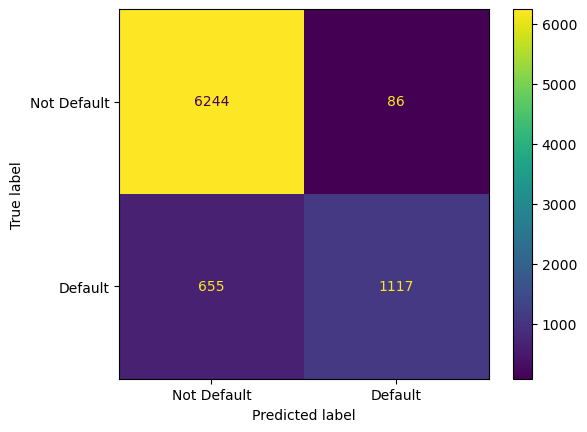

In [194]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred_svc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Not Default', 'Default'])

cm_display.plot()
plt.show()

In [195]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train_sc, y_train)


KNeighborsClassifier(n_neighbors=8)

In [196]:
pred_knn = neigh.predict(X_test_sc)

In [197]:
np.mean(pred_knn == y_test)

0.8986669958035053